<a href="https://colab.research.google.com/github/Tung0000/Dfferenttransfer-model-and-cnn/blob/main/Workshop_VGG16%2CMobileV2_net%2C_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Workshop 1: VGG16 :Feature Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

###Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
target_img_shape = (64, 64)    # image size W x H
EPOCH =20

#Load Data Set

In [ ]:
train_dir = '/content/drive/MyDrive/Dataset Cloud/Dataset Cloud/clouds_train'                   # สำหรับฝึกสอน Train   cat 100 dog 100
val_dir   = '/content/drive/MyDrive/Dataset Cloud/Dataset Cloud/clouds_validation'                     # ข้อมูลสำหรับสำหรับ Validation  cat 10 dog 10

# test_dir = '/content/drive/MyDrive/Data_Animal_Dog_Cat/test'                   # สำหรับทดสอบ Test ถ้ามี

###Read Train set and Val Set

* Train Set
* Validation Set



In [ ]:
#Train Set
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                                  rotation_range=20,
                                                  rescale=1./255,
                                                  height_shift_range=0.15,
                                                  width_shift_range=0.15,
                                                  shear_range=0.2,
                                                  zoom_range=0.2,
                                                  horizontal_flip=True,
                                                  fill_mode='nearest')
train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32,                          # แบ่งเป็น Batch ละ 32 ภาพ
                                                 class_mode='sparse')       # คลาสแบบ Binary

#Validation Set
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_set= val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='sparse')

###ตรวจสอบมิติของข้อมูล

In [ ]:
ids, counts = np.unique(train_set.classes, return_counts=True)

print(ids)
print(counts)

In [ ]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

###Model

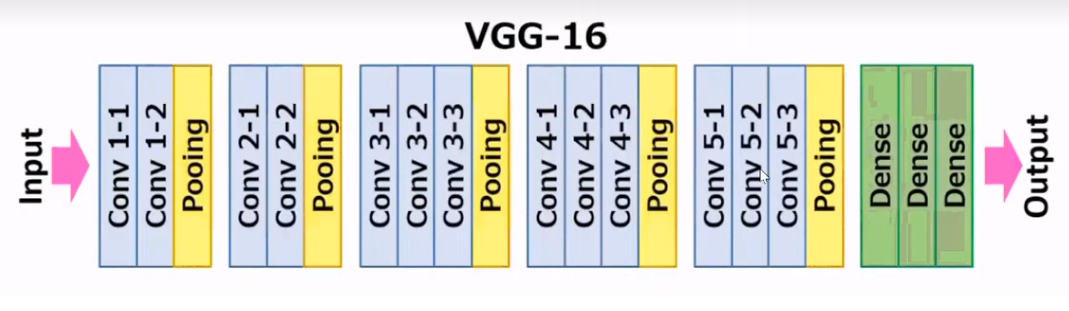

In [ ]:
#เตรียม Input

in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

#VGG16

In [ ]:
#สร้าง base_model  โดยตัดส่วน Classification ทิ้ง
base_model = VGG16(include_top=False,               # ตัดส่วน Top ทิ้งไป
                   weights='imagenet',              # โหลด weight imageNet
                   input_shape=in_shape)            # กำหนดขนาด Image size
base_model.summary()                                # ดูสรุป

In [ ]:
# ตัดส่วน Classification ทิ้ง แล้วใส่ Classification ของใหม่

model =Sequential()                                #เริ่ม Model
model.add(base_model)                           #ใส่ base model เป็นฐาน

#สร้าง NN   ออกแบบตามงานใหม่ของเรา

model.add(Flatten())                                #เริ่มใส่ส่วน Top ที่ตรงกับงานเราเข้าไปใน NN
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation ='sigmoid'))
model.summary()

###Freeze หรือ Frozen

>จากนั้น Train เฉพาะส่วน Classification เท่านั้น ส่วนที่เป็น Feature Extraction เดิม ล็อกไว้

In [ ]:
base_model.trainable = False

model.summary()

#Train vgg16

In [ ]:
import time

model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) #
# mc = ModelCheckpoint('TL1 tr300.h5', monitor='val_accuracy', verbose=1, save_best_only=True) #

start = time.time()
history = model.fit(train_set,
                     validation_data=val_set,
                    epochs=EPOCH, verbose=1) #, callbacks=[es, mc])

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

In [ ]:
model.evaluate(train_set)

In [ ]:
model.evaluate(val_set)

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], lw=3.2, label='Validation loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], lw=3.2, label='Validation')
plt.legend()

plt.show()

#Model Mobilev2.net

In [ ]:
base_model_Mobile = MobileNetV2(include_top=False,               # ตัดส่วน Top ทิ้งไป
                   weights='imagenet',              # โหลด weight imageNet
                   input_shape=in_shape)            # กำหนดขนาด Image size
base_model.summary()

In [ ]:
# ตัดส่วน Classification ทิ้ง แล้วใส่ Classification ของใหม่
model_Mobil_net=Sequential()                             #เริ่ม Model
model_Mobil_net.add(base_model_Mobile )                           #ใส่ base model เป็นฐาน

#สร้าง NN   ออกแบบตามงานใหม่ของเรา

model_Mobil_net.add(Flatten())                            #เริ่มใส่ส่วน Top ที่ตรงกับงานเราเข้าไปใน NN
model_Mobil_net.add(Dense(128,activation='relu'))
model_Mobil_net.add(Dense(7,activation ='sigmoid'))
model_Mobil_net.summary()

###Freeze หรือ Frozen

>จากนั้น Train เฉพาะส่วน Classification เท่านั้น ส่วนที่เป็น Feature Extraction เดิม ล็อกไว้

In [ ]:
base_model_Mobile.trainable = False

model_Mobil_net.summary()

#Train Mobilev2.net

In [ ]:
import time

model_Mobil_net.compile(loss='sparse_categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) #
# mc = ModelCheckpoint('TL1 tr300.h5', monitor='val_accuracy', verbose=1, save_best_only=True) #

start = time.time()
historys= model_Mobil_net.fit(train_set,
                     validation_data=val_set,
                    epochs=EPOCH, verbose=1) #, callbacks=[es, mc])

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

In [ ]:
model_Mobil_net.evaluate(train_set)

In [ ]:
model_Mobil_net.evaluate(val_set)

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(historys.history['loss'], label='Training Loss')
plt.plot(historys.history['val_loss'], lw=3.2, label='Validation loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(historys.history['accuracy'], label='Training')
plt.plot(historys.history['val_accuracy'], lw=3.2, label='Validation')
plt.legend()

plt.show()

#CNN


In [ ]:
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [ ]:
model_cnn =Sequential()                             #เริ่ม Model
model_cnn.add(Conv2D(32,(3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Conv2D(64,(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))


model_cnn.add(Conv2D(128,(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))



model_cnn.add(Flatten())                            #เริ่มใส่ส่วน Top ที่ตรงกับงานเราเข้าไปใน NN
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dense(7,activation ='sigmoid'))
model_cnn.summary()

In [ ]:
from keras.optimizers import Adam

In [ ]:
import time
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_cnn.compile(loss='sparse_categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) #
# mc = ModelCheckpoint('TL1 tr300.h5', monitor='val_accuracy', verbose=1, save_best_only=True) #

start = time.time()
historyss= model_cnn.fit(train_set,
                     validation_data=val_set,
                    epochs=EPOCH, verbose=1) #, callbacks=[es, mc])

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(historyss.history['loss'], label='Training Loss')
plt.plot(historyss.history['val_loss'], lw=3.2, label='Validation loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(historyss.history['accuracy'], label='Training')
plt.plot(historyss.history['val_accuracy'], lw=3.2, label='Validation')
plt.legend()

plt.show()

In [ ]:
model_cnn.evaluate(train_set)

In [ ]:
model_cnn.evaluate(val_set)

#Display graph

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict(img_fname):
    img = load_img(img_fname, target_size=target_img_shape)

    plt.imshow(img)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    pred = model.predict(img)
    pred_cls = np.argmax(pred)
    print('Prediction:',pred_cls)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# เก็บข้อมูลลง DataFrame
data = {
    "Model": ["CNN ", "MobileNet", "VGG16"],
    "Train Accuracy": [0.8607, 0.8691, 0.9113],
    "Val Accuracy": [0.2112, 0.1267, 0.3662],
    "Training Time (min)": [1.04, 1.46, 0.96]
}

df = pd.DataFrame(data)

# --------- Plot 1: Accuracy ---------
plt.figure(figsize=(8,5))
df.plot(x="Model", y=["Train Accuracy", "Val Accuracy"], kind="bar")
plt.title("Train and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.legend()
plt.show()

# --------- Plot 2: Training Time ---------
plt.figure(figsize=(8,5))
df.plot(x="Model", y="Training Time (min)", kind="bar", color="orange")
plt.title("Training Time per Model")
plt.ylabel("Minutes")
plt.xticks(rotation=0)
plt.show()
